In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Loading dataset

## Dataset

This dataset about video game sales. The dataset contains **240** objects. Each object represents a game, it's sales and ratings, which is described by **7** features.

## Features description

This is a dataset consisting of several features of stars.

Some of them are:

- Absolute Temperature (in K)
- Relative Luminosity (L/Lo)
- Relative Radius (R/Ro)
- Absolute Magnitude (Mv)
- Star Color (white,Red,Blue,Yellow,yellow-orange etc)
- Spectral Class (O,B,A,F,G,K,,M)
- Star Type **(Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)**
- Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)
- Ro = 6.9551 x 10^8 m (Avg Radius of Sun)

In [64]:
df = pd.read_csv('star_dataset.csv')
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


Now we will get information about number of non-nulls and type of each feature

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperature         240 non-null    int64  
 1   Luminosity          240 non-null    float64
 2   Radius              240 non-null    float64
 3   Absolute_magnitude  240 non-null    float64
 4   Star type           240 non-null    int64  
 5   Star color          240 non-null    object 
 6   Spectral Class      240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


There is no missings in data, so we can use all objects.

Noц we will change the names of some columns to simpler ones.

In [65]:
df.rename(columns={'Temperature (K)': 'Temperature', 'Luminosity(L/Lo)': 'Luminosity', 'Radius(R/Ro)':'Radius',
                  'Absolute magnitude(Mv)':'Absolute magnitude'}, inplace=True)

Now we will make dataframe X, which consists of quantitative columns

In [66]:
quantitative_columns = ['Temperature', 'Luminosity', 'Radius', 'Absolute magnitude']

X = df[quantitative_columns]
X

,Temperature,Luminosity,Radius,Absolute magnitude
0,3068,0.002400,0.1700,16.12
1,3042,0.000500,0.1542,16.60
2,2600,0.000300,0.1020,18.70
3,2800,0.000200,0.1600,16.65
4,1939,0.000138,0.1030,20.06
...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93
236,30839,834042.000000,1194.0000,-10.63
237,8829,537493.000000,1423.0000,-10.73
238,9235,404940.000000,1112.0000,-11.23


### Applying Batch K-Means 

We apply KMeans from sklearn library with specified parameters 10 times and choose best one. We choose all 4 quantitative features ('Temperature', 'Luminosity', 'Radius', 'Absolute Magnitude') because all of them represent different parameters of stars and all of them are significant for classification and clusterisation.

In [67]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Ks = [4,7] #number of clusters

X_scaled = StandardScaler().fit_transform(X) #standardizing data

inertias = np.zeros((2,10)) #array, which contains inertias for each number of cluster (row)
                            #and for each initialization of KMeans (column)

best_inertias=[] #contains best_inertias for every cluster

j=0 #number of row in inertias
for k in Ks: #k is a number of clusters
    best_inertia = 1e10 #initial inertia
    
    for i in range(10): 
        kmeans = KMeans(n_clusters=k, n_init = 1, max_iter = 500, init='random', 
                           tol=1e-4, algorithm='full', random_state = i).fit(X_scaled) 
                        #apply KMeans 10 times with k clusters, maximum number of iterations 500
                        #random initial cluster centers, relative tolerance 0.0001, EM-style algorythm
                        # and random state i
                    
        inertias[j,i]=kmeans.inertia_
            
        tmp_labels = kmeans.labels_ #cluster labels for each object
            
        if inertias[j,i] < best_inertia: #choose the best clustering
            best_inertia = inertias[j,i] #save best_inertia
            best_labels = tmp_labels #save labels for best inertia
            best_random = i #save random_state for reproducing the results
    df['cluster_id_' + str(k)] = best_labels #sve cluster labels in additional column
    best_inertias = np.append(inertias, best_inertia)
    print("Best inertia for "+str(k)+"-cluster clustering:", best_inertia)
    print("Random state for this clustering: ", best_random)
    print()
    j+=1

Best inertia for 4-cluster clustering: 256.8953857589539
Random state for this clustering:  9

Best inertia for 7-cluster clustering: 136.50785707441952
Random state for this clustering:  2



In [91]:
print(inertias)

[[281.50641631 257.21310474 283.93293069 277.04870372 264.85695296
  282.05251763 281.50641631 281.50641631 257.21310474 256.89538576]
 [140.63433072 147.50836015 136.50785707 137.00889523 137.00889523
  137.00889523 198.68316395 137.06211114 192.15358365 137.00889523]]


### Table of inertias 


| Number of clusters |i=1|i=2|i=3|i=4|i=5|i=6|i=7|i=8|i=9|i=10|
|:------------------:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|4                   |281.5|257.21|283.93|277.05|264.86|282.05|281.51|281.51|257.21|256.9|
|7                   |140.63|147.51|136.51|137.01|137.01|137.01|198.68|137.06|192.15|137.01|

Now let's save new dataset with cluster labels

In [69]:
df.to_csv("Stars_with_clusters.csv")

In [51]:
categorical_columns = ["Star type", "Star color", "Spectral Class"]

In [52]:
type_unique = df["Star type"].unique()
type_num = [len(df[df["Star type"]==el]) for el in type_unique]

color_unique = df["Star color"].unique()
color_num = [len(df[df["Star color"]==el]) for el in color_unique]

class_unique = df["Spectral Class"].unique()
class_num = [len(df[df["Spectral Class"]==el]) for el in class_unique]

# Star type

Good

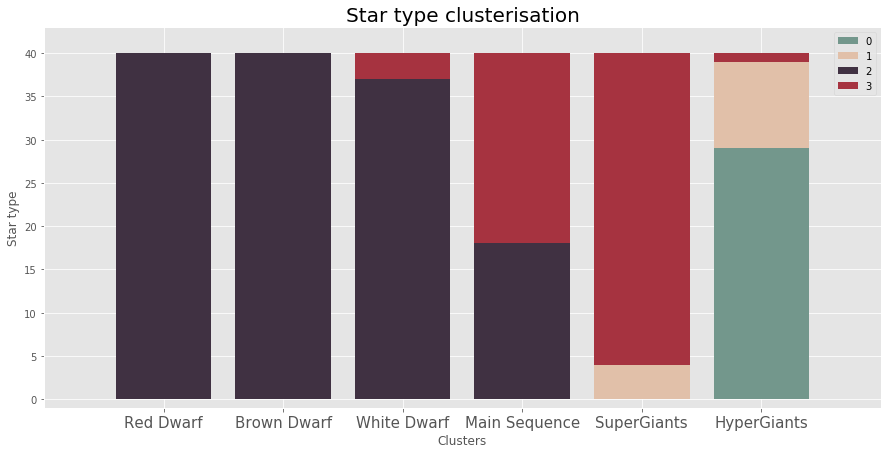

In [90]:
plt.style.use('ggplot')

plt.figure(figsize=(15,7))
type_num_for_cluster = np.array([[len(df[(df.cluster_id_4==i)&(df["Star type"] == el)]) for el in type_unique]
                                 for i in range(4)])

plt.bar(type_unique, type_num_for_cluster[0], label='0', color='#73978C')
plt.bar(type_unique, type_num_for_cluster[1], bottom=type_num_for_cluster[0], label ='1', color='#E1C0A9')
plt.bar(type_unique, type_num_for_cluster[2], bottom=type_num_for_cluster[1]+type_num_for_cluster[0], label ='2',
       color='#403142')
plt.bar(type_unique, type_num_for_cluster[3],
       bottom=type_num_for_cluster[2]+type_num_for_cluster[1]+type_num_for_cluster[0], label ='3', color='#A63340')
plt.legend()
plt.xticks(type_unique, ['Red Dwarf', 'Brown Dwarf', 'White Dwarf', 'Main Sequence', 'SuperGiants', 'HyperGiants'],
           fontsize = 15, fontweight=400)
plt.ylabel("Star type")
plt.xlabel("Clusters")
plt.title("Star type clusterisation", fontsize = 20)
plt.gca().set_ylim(-1,43)
plt.gca().set_xlim(-1,6)
plt.show()

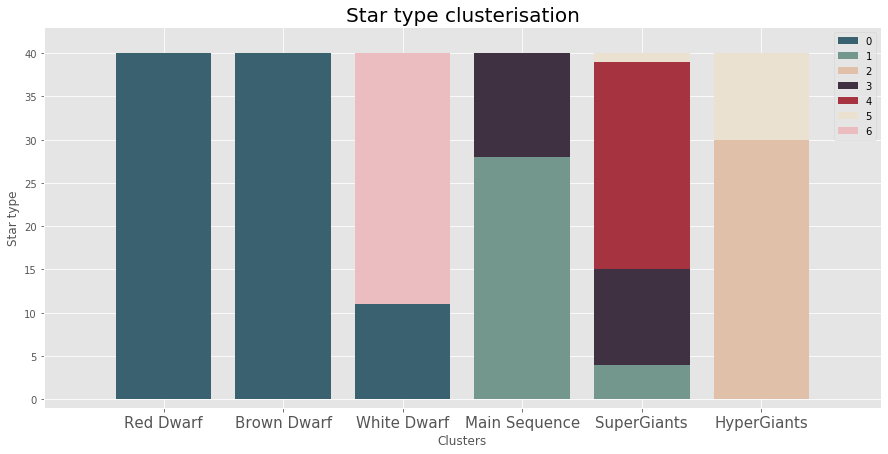

In [89]:
fig, ax = plt.subplots(figsize = (15,7))
    
type_num_for_cluster = np.array([[len(df[(df.cluster_id_7==i)&(df["Star type"] == el)]) for el in type_unique]
                                 for i in range(7)])

ax.bar(type_unique, type_num_for_cluster[0], label='0', color='#3a6170')
ax.bar(type_unique, type_num_for_cluster[1], bottom=type_num_for_cluster[0], label ='1', color = '#73978C')
ax.bar(type_unique, type_num_for_cluster[2], bottom=type_num_for_cluster[1]+type_num_for_cluster[0], label ='2',
       color='#E1C0A9')
ax.bar(type_unique, type_num_for_cluster[3],
       bottom=type_num_for_cluster[2]+type_num_for_cluster[1]+type_num_for_cluster[0], label ='3', color='#403142')
ax.bar(type_unique, type_num_for_cluster[4],
       bottom=type_num_for_cluster[3]+type_num_for_cluster[2]+type_num_for_cluster[1]+type_num_for_cluster[0],
       label ='4', color='#A63340')
ax.bar(type_unique, type_num_for_cluster[5],
       bottom=type_num_for_cluster[4]+type_num_for_cluster[3]+type_num_for_cluster[2]+
       type_num_for_cluster[1]+type_num_for_cluster[0],label ='5', color='#EAE1D0')
ax.bar(type_unique, type_num_for_cluster[6],
       bottom=type_num_for_cluster[5]+type_num_for_cluster[4]+type_num_for_cluster[3]+
       type_num_for_cluster[2]+type_num_for_cluster[1]+type_num_for_cluster[0], label ='6', color ='#ebbcc0')
plt.legend()
plt.xticks(type_unique, ['Red Dwarf', 'Brown Dwarf', 'White Dwarf', 'Main Sequence', 'SuperGiants', 'HyperGiants'],
           fontsize = 15, fontweight=400)
plt.ylabel("Star type")
plt.xlabel("Clusters")
plt.title("Star type clusterisation", fontsize = 20)
plt.gca().set_ylim(-1,43)
plt.gca().set_xlim(-1,6)
plt.show()